# 데이터 불러오기 및 둘러보기

In [1]:
for_df = pd.read_csv("CARD_SPENDING_FOREIGNER.txt", sep="\t", encoding = 'euc-kr')
res_df = pd.read_csv("CARD_SPENDING_RESIDENT.txt", sep="\t", encoding = 'euc-kr')

In [2]:
for_df.info(), res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238829 entries, 0 to 238828
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   STD_DD      238829 non-null  int64  
 1   GU_CD       238829 non-null  int64  
 2   DONG_CD     238829 non-null  int64  
 3   MCT_CAT_CD  238829 non-null  int64  
 4   COUNTRY_NM  238829 non-null  object 
 5   USE_CNT     238829 non-null  int64  
 6   USE_AMT     238826 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 12.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537753 entries, 0 to 2537752
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   STD_DD      int64 
 1   GU_CD       int64 
 2   DONG_CD     int64 
 3   MCT_CAT_CD  int64 
 4   SEX_CD      object
 5   AGE_CD      int64 
 6   USE_CNT     int64 
 7   USE_AMT     int64 
dtypes: int64(7), object(1)
memory usage: 154.9+ MB


(None, None)

# 국내 카드 사용 데이터

## 업종 코드 한글로 변환

In [3]:
# 업종 보기 편하게 한글로 넣어주기
idx_10 = res_df["MCT_CAT_CD"]== 10
idx_20 = res_df["MCT_CAT_CD"]== 20
idx_21 = res_df["MCT_CAT_CD"]== 21
idx_22 = res_df["MCT_CAT_CD"]==22
idx_30 = res_df["MCT_CAT_CD"]==30
idx_31 = res_df["MCT_CAT_CD"]==31
idx_32 = res_df["MCT_CAT_CD"]==32
idx_33 = res_df["MCT_CAT_CD"]==33
idx_34 = res_df["MCT_CAT_CD"]==34
idx_35 = res_df["MCT_CAT_CD"]==35
idx_40 = res_df["MCT_CAT_CD"]==40
idx_42 = res_df["MCT_CAT_CD"]==42
idx_43 = res_df["MCT_CAT_CD"]==43
idx_44 = res_df["MCT_CAT_CD"]==44
idx_50 = res_df["MCT_CAT_CD"]==50
idx_52 = res_df["MCT_CAT_CD"]==52
idx_60 = res_df["MCT_CAT_CD"]==60
idx_62 = res_df["MCT_CAT_CD"]==62
idx_70 = res_df["MCT_CAT_CD"]==70
idx_71 = res_df["MCT_CAT_CD"]==71
idx_80 = res_df["MCT_CAT_CD"]==80
idx_81 = res_df["MCT_CAT_CD"]==81
idx_92 = res_df["MCT_CAT_CD"]==92

In [4]:
res_df["업종"] = 0
res_df.loc[idx_10, "업종"] = "숙박"
res_df.loc[idx_20, "업종"] = "레저용품"
res_df.loc[idx_21, "업종"] = "레저업소"
res_df.loc[idx_22, "업종"] = "문화취미"
res_df.loc[idx_30, "업종"] = "가구"
res_df.loc[idx_31, "업종"] = "전기"
res_df.loc[idx_32, "업종"] = "주방용구"
res_df.loc[idx_33, "업종"] = "연료판매"
res_df.loc[idx_34, "업종"] = "광학제품"
res_df.loc[idx_35, "업종"] = "가전"
res_df.loc[idx_40, "업종"] = "유통업"
res_df.loc[idx_42, "업종"] = "의복"
res_df.loc[idx_43, "업종"] = "직물"
res_df.loc[idx_44, "업종"] = "신변잡화"
res_df.loc[idx_50, "업종"] = "서적문구"
res_df.loc[idx_52, "업종"] = "사무통신"
res_df.loc[idx_60, "업종"] = "자동차판매"
res_df.loc[idx_62, "업종"] = "자동차정비"
res_df.loc[idx_70, "업종"] = "의료기관"
res_df.loc[idx_71, "업종"] = "보건위생"
res_df.loc[idx_80, "업종"] = "요식업소"
res_df.loc[idx_81, "업종"] = "음료식품"
res_df.loc[idx_92, "업종"] = "수리서비스"

In [5]:
# 원래 코드 업종 컬럼은 drop
res_df.drop("MCT_CAT_CD", axis=1, inplace=True)

# 23개 업종
len(res_df["업종"].unique()), res_df["업종"].unique()

(23,
 array(['숙박', '레저용품', '레저업소', '전기', '주방용구', '연료판매', '광학제품', '유통업', '사무통신',
        '자동차정비', '의료기관', '보건위생', '요식업소', '음료식품', '수리서비스', '문화취미', '가구',
        '가전', '의복', '신변잡화', '서적문구', '직물', '자동차판매'], dtype=object))

### 아웃라이어 존재하나?

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

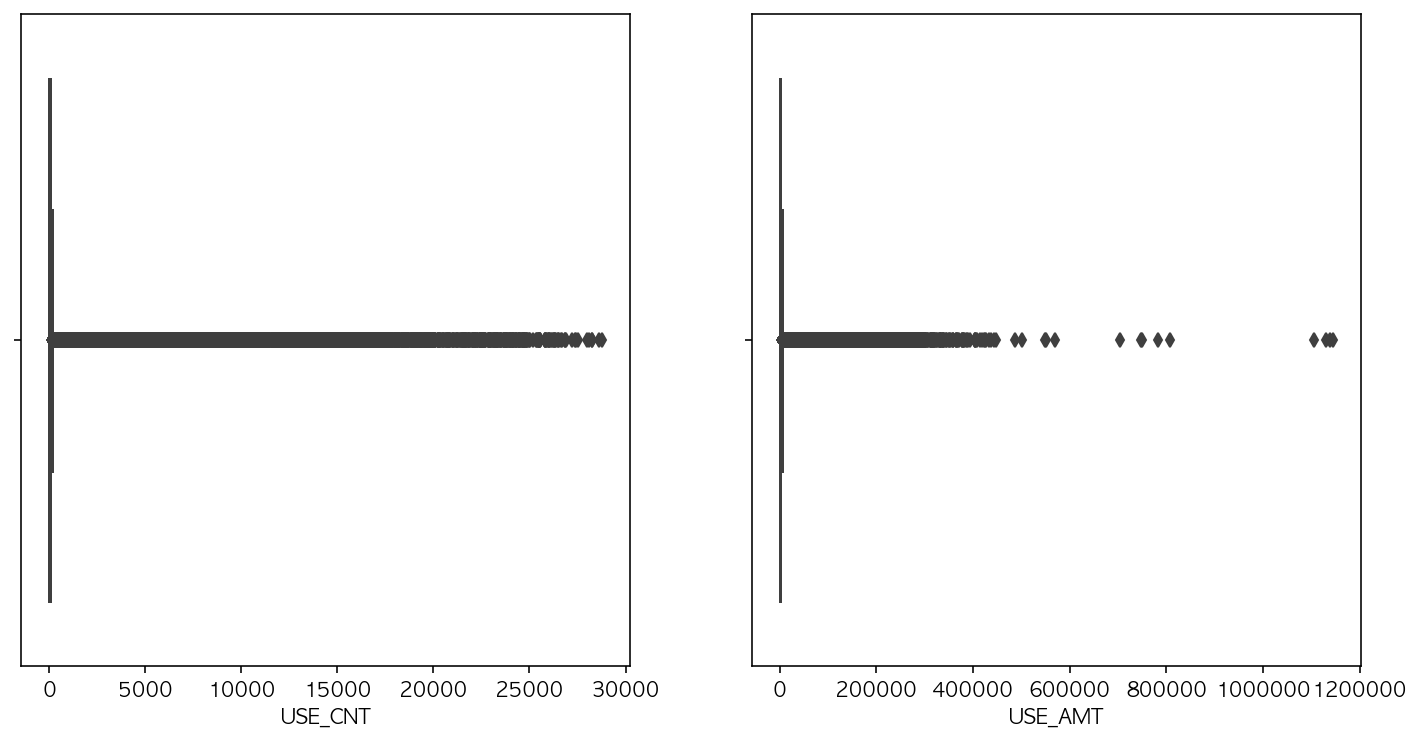

<Figure size 720x720 with 0 Axes>

In [7]:
fig, axx = plt.subplots(1,2,figsize=(12,6))
plt.figure(figsize=(10,10))
sns.boxplot("USE_CNT", data=res_df, ax=axx[0])
sns.boxplot("USE_AMT", data=res_df, ax=axx[1])

In [8]:
# use amount의 outlier
res_df[res_df["USE_AMT"] > 1000000]

,STD_DD,GU_CD,DONG_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,업종
205996,20190220,350,619,M,50,72,1131479,의료기관
492244,20190318,350,619,M,50,118,1138041,의료기관
809699,20190416,350,619,M,50,105,1145021,의료기관
1197785,20190521,350,619,M,50,66,1106119,의료기관


- 전부 50대 남성의 의료기관 데이터
- outlier가 아니라 그냥 의료비라고 봐도 될 듯
- 근데 왜 2020년은 없지?
- 비대면 의료에 대한 인사이트? 흠

In [63]:
# 모든 연령이 모든 업종에서 매일 돈을 쓰는건 아닌가보오
df1 = res_df[(res_df["STD_DD"]==20190215) & (res_df["GU_CD"]==140) & (res_df["DONG_CD"]==550) & 
      (res_df["SEX_CD"]=="F")]
df1.pivot_table(index="업종", columns="AGE_CD", values="USE_CNT")

# 구역 단위가 동이라서 작아서 그런 것 같음

AGE_CD,20,25,30,35,40,45,50,55,60,65
업종,,,,,,,,,,
가전,5.0,NaN,9.0,9.0,5.0,5.0,5.0,5.0,NaN,NaN
광학제품,5.0,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN
레저업소,18.0,14.0,5.0,5.0,9.0,NaN,9.0,NaN,NaN,5.0
레저용품,461.0,271.0,185.0,167.0,271.0,384.0,226.0,118.0,54.0,54.0
문화취미,86.0,59.0,45.0,77.0,5.0,41.0,14.0,18.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...
음료식품,231.0,520.0,452.0,240.0,226.0,190.0,108.0,36.0,95.0,59.0
의료기관,262.0,579.0,520.0,429.0,285.0,344.0,240.0,145.0,181.0,72.0
의복,588.0,334.0,122.0,145.0,122.0,199.0,140.0,81.0,36.0,18.0


## 구 단위로 합치기

### 구 단위로 합쳐도 될지 데이터 불균형 먼저 검사

In [9]:
#res_df_dong은 나중에 혹시 동 필요하면 사용할 것
res_df_dong = res_df.copy()

In [10]:
res_df.drop("DONG_CD", axis=1, inplace=True)
res_df

,STD_DD,GU_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,업종
0,20190201,110,F,25,11,595,숙박
1,20190201,110,F,50,5,243,숙박
2,20190201,110,F,55,5,27,숙박
3,20190201,110,M,20,11,243,숙박
4,20190201,110,M,25,11,433,숙박
...,...,...,...,...,...,...,...
2537748,20200531,350,M,45,19,127,음료식품
2537749,20200531,350,M,50,33,211,음료식품
2537750,20200531,350,M,55,9,61,음료식품
2537751,20200531,350,M,60,19,194,음료식품


In [11]:
# 보기 편하게 구 이름 한글 변환
res_df.loc[res_df["GU_CD"]==140, "GU_CD"] = "서울 중구"
res_df.loc[res_df["GU_CD"]==350, "GU_CD"] = "서울 노원구"
res_df.loc[res_df["GU_CD"]==260, "GU_CD"] = "대구 수성구"
res_df.loc[res_df["GU_CD"]==110, "GU_CD"] = "대구 중구"

In [12]:
res_df["GU_CD"].unique()

array(['대구 중구', '서울 중구', '대구 수성구', '서울 노원구'], dtype=object)

In [13]:
df2 = res_df[(res_df["STD_DD"]==20190215) & (res_df["GU_CD"]=="서울 중구") & 
      (res_df["SEX_CD"]=="F")]
df2.pivot_table(index="업종", columns="AGE_CD", values="USE_CNT", aggfunc="count")

AGE_CD,20,25,30,35,40,45,50,55,60,65
업종,,,,,,,,,,
가구,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
가전,2.0,NaN,4.0,2.0,3.0,6.0,4.0,4.0,4.0,1.0
광학제품,4.0,3.0,3.0,3.0,NaN,2.0,4.0,NaN,2.0,1.0
레저업소,11.0,9.0,9.0,5.0,7.0,6.0,9.0,5.0,NaN,3.0
레저용품,2.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0
문화취미,7.0,5.0,6.0,7.0,9.0,8.0,7.0,5.0,3.0,3.0
보건위생,13.0,13.0,12.0,12.0,12.0,13.0,13.0,13.0,13.0,12.0
사무통신,3.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0
서적문구,9.0,11.0,9.0,9.0,9.0,7.0,8.0,8.0,4.0,5.0


In [15]:
res_df.to_csv("카드소비", encoding='utf-8')

In [69]:
df2 = res_df_dong[(res_df_dong["STD_DD"]==20190215) & (res_df_dong["GU_CD"]==140) & 
      (res_df_dong["SEX_CD"]=="F")&(res_df_dong["AGE_CD"]==20) &
                  (res_df_dong["업종"]=="요식업소")]
#len(df2["업종"].unique())
pd.options.display.max_rows = len(df2["업종"])
len(df2["업종"]), df2

(15,
           STD_DD  GU_CD  DONG_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT    업종
 145060  20190215    140      520      F      20    14270   104100  요식업소
 145358  20190215    140      540      F      20      692     8126  요식업소
 145661  20190215    140      550      F      20     2943    39211  요식업소
 145868  20190215    140      570      F      20     1220    19032  요식업소
 146009  20190215    140      580      F      20      307     3994  요식업소
 146261  20190215    140      590      F      20     1180    14227  요식업소
 146490  20190215    140      605      F      20      610    10123  요식업소
 146688  20190215    140      615      F      20      353     6098  요식업소
 146844  20190215    140      625      F      20      208     2544  요식업소
 146992  20190215    140      635      F      20      136     1120  요식업소
 147119  20190215    140      645      F      20      149     2054  요식업소
 147271  20190215    140      650      F      20      108     1442  요식업소
 147407  20190215    140      665      F      

- 보니까 한 동에 모든 업종에 대해 모든 연령, 성별이 각각 들어가있는 구조 
- 단, 그 동에서 그날 그 업종이 transaction 없는 경우는 존재하지 않을 수 있음

### 동별로 나눠져있는 데이터를 구별로 합쳐주기

In [14]:
# 서울 중구
res_sj = res_df[res_df["GU_CD"]=="서울 중구"]

# 서울 노원구
res_sn = res_df[res_df["GU_CD"]=="서울 노원구"]

# 대구 중구
res_dj = res_df[res_df["GU_CD"]=="대구 중구"]

# 대구 수성구
res_ds = res_df[res_df["GU_CD"]=="대구 수성구"]

In [128]:
# 서울 중구 월별 컬럼 추가
res_sj["STD_DD"] = res_sj["STD_DD"].astype("str")
res_sj["mm"] = res_sj["STD_DD"].apply(lambda x : x[0:6])
res_sj["mm"]

# 서울 노원
res_sn["STD_DD"] = res_sn["STD_DD"].astype("str")
res_sn["mm"] = res_sn["STD_DD"].apply(lambda x : x[0:6])
res_sn["mm"]

# 대구 중구
res_dj["STD_DD"] = res_dj["STD_DD"].astype("str")
res_dj["mm"] = res_dj["STD_DD"].apply(lambda x : x[0:6])
res_dj["mm"]

# 대구 수성
res_ds["STD_DD"] = res_ds["STD_DD"].astype("str")
res_ds["mm"] = res_ds["STD_DD"].apply(lambda x : x[0:6])
res_ds["mm"]

4562       201902
4563       201902
4564       201902
4565       201902
4566       201902
            ...  
2534696    202005
2534697    202005
2534698    202005
2534699    202005
2534700    202005
Name: mm, Length: 746820, dtype: object

In [129]:
import datetime

In [130]:
# 서울 중구
res_sj = res_sj[["USE_CNT", "USE_AMT"]].groupby([res_sj["STD_DD"],res_sj["SEX_CD"],
                                                    res_sj["AGE_CD"], res_sj["업종"]]).sum()
res_sj.reset_index(inplace=True)
res_sj["STD_DD"] = pd.to_datetime(res_sj["STD_DD"])

In [131]:
res_sj

,STD_DD,SEX_CD,AGE_CD,업종,USE_CNT,USE_AMT
0,2019-02-01,F,20,가전,5,235
1,2019-02-01,F,20,광학제품,55,1641
2,2019-02-01,F,20,레저업소,260,2689
3,2019-02-01,F,20,레저용품,606,46850
4,2019-02-01,F,20,문화취미,127,1583
...,...,...,...,...,...,...
95870,2020-05-31,M,65,의료기관,137,2328
95871,2020-05-31,M,65,의복,137,5596
95872,2020-05-31,M,65,자동차정비,234,2037
95873,2020-05-31,M,65,주방용구,24,2533


In [132]:
# 서울 노원구
res_sn = res_sn[["USE_CNT", "USE_AMT"]].groupby([res_sn["STD_DD"],res_sn["SEX_CD"],
                                                    res_sn["AGE_CD"], res_sn["업종"]]).sum()
res_sn.reset_index(inplace=True)
res_sn["STD_DD"] = pd.to_datetime(res_sn["STD_DD"])

# 대구 중구
res_dj = res_dj[["USE_CNT", "USE_AMT"]].groupby([res_dj["STD_DD"],res_dj["SEX_CD"],
                                                    res_dj["AGE_CD"], res_dj["업종"]]).sum()
res_dj.reset_index(inplace=True)
res_dj["STD_DD"] = pd.to_datetime(res_dj["STD_DD"])

# 대구 수성구
res_ds = res_ds[["USE_CNT", "USE_AMT"]].groupby([res_ds["STD_DD"],res_ds["SEX_CD"],
                                                    res_ds["AGE_CD"], res_ds["업종"]]).sum()
res_ds.reset_index(inplace=True)
res_ds["STD_DD"] = pd.to_datetime(res_ds["STD_DD"])


In [136]:
res_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82950 entries, 0 to 82949
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STD_DD   82950 non-null  datetime64[ns]
 1   SEX_CD   82950 non-null  object        
 2   AGE_CD   82950 non-null  int64         
 3   업종       82950 non-null  object        
 4   USE_CNT  82950 non-null  int64         
 5   USE_AMT  82950 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.8+ MB


### 업종별로만 시계열로 19/20 비교하기

- 서울 중구

In [133]:
# 업종, 날짜만
sj_m = res_sj[["USE_CNT", "USE_AMT"]].groupby([res_sj["업종"], res_sj["STD_DD"]]).sum()
sj_m.reset_index(inplace=True)

# 19년도
sj_m["STD_DD"] = sj_m["STD_DD"].astype("str")
sj_19 = sj_m[sj_m["STD_DD"].str.contains("2019")]

# 20년도
sj_m["STD_DD"] = sj_m["STD_DD"].astype("str")
sj_20 = sj_m[sj_m["STD_DD"].str.contains("2020")]

# 업종코드 
mct = res_sj["업종"].unique()

가전


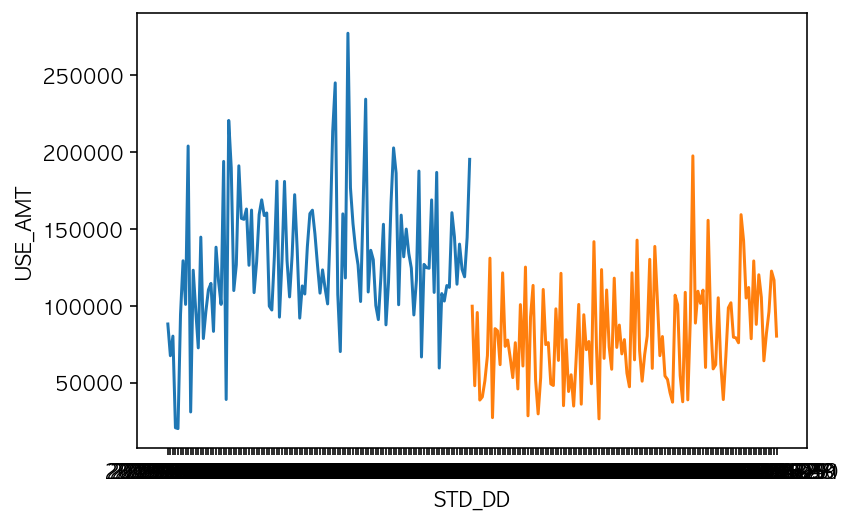

In [163]:
print(mct[0])

sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[0]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[0]])

광학제품


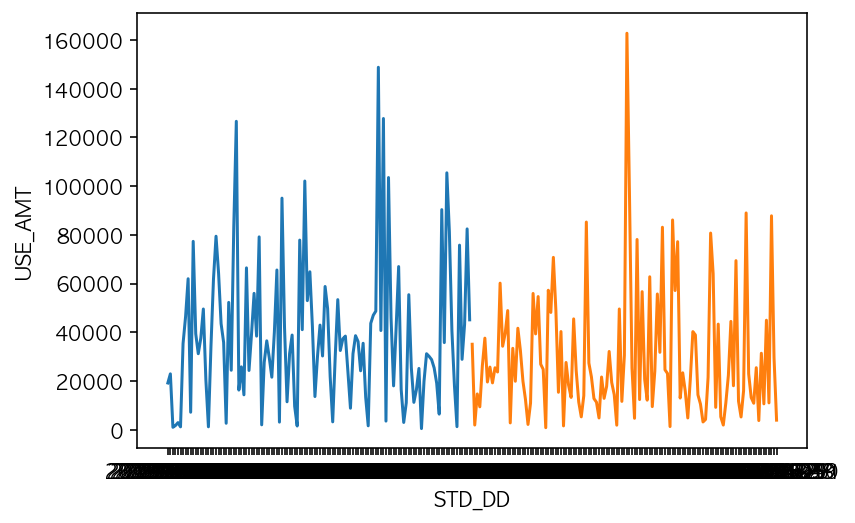

In [164]:
print(mct[1])

sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[1]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[1]])

레저업소


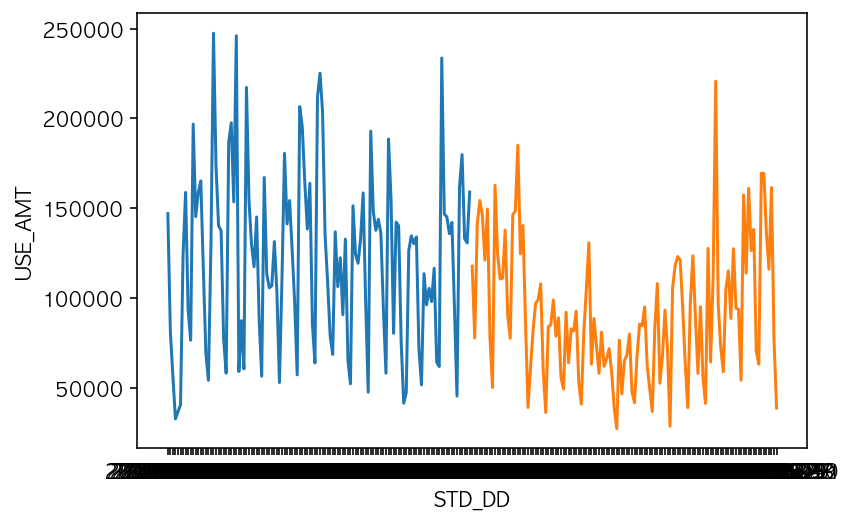

In [165]:
print(mct[2])

sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[2]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[2]])

레저용품


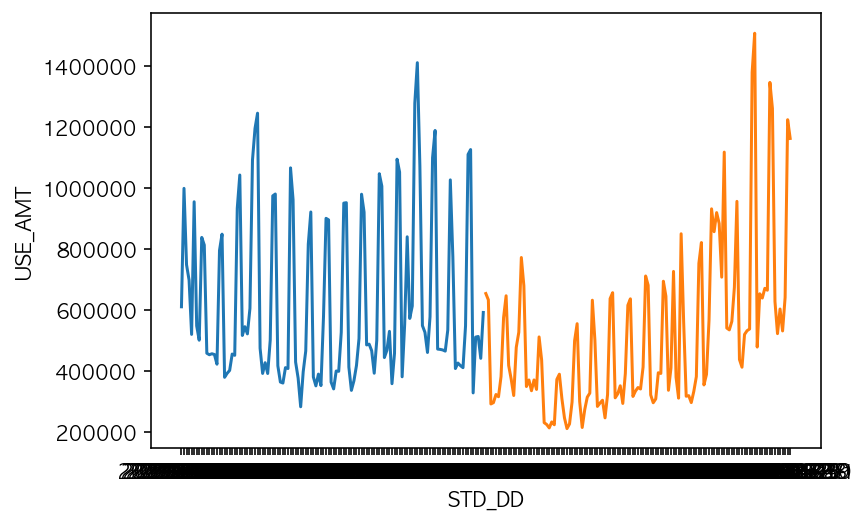

In [166]:
print(mct[3])

sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[3]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[3]])

Text(0.5, 1.0, '문화취미')

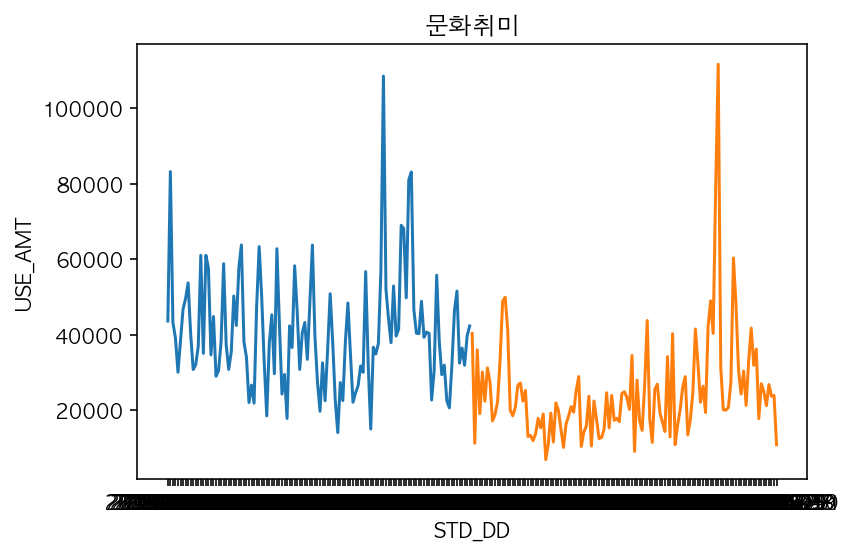

In [168]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[4]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[4]])
plt.title(mct[4])

Text(0.5, 1.0, '보건위생')

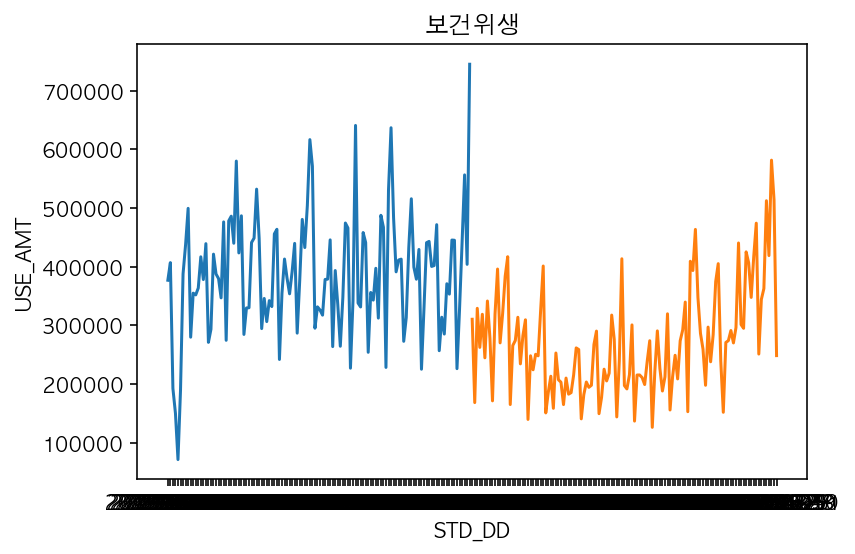

In [170]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[5]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[5]])
plt.title(mct[5])

Text(0.5, 1.0, '보건위생')

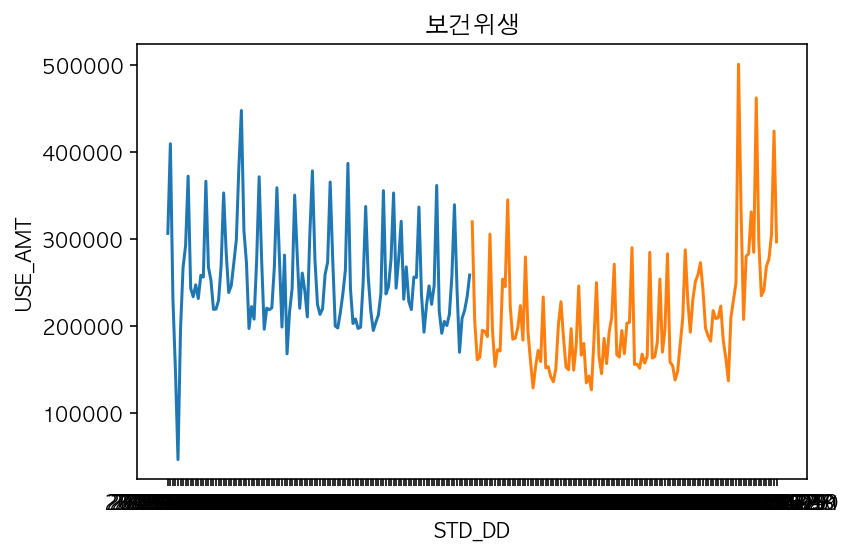

In [216]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_19[sn_19["업종"]=="보건위생"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_20[sn_20["업종"]=="보건위생"])
plt.title("보건위생")

Text(0.5, 1.0, '보건위생')

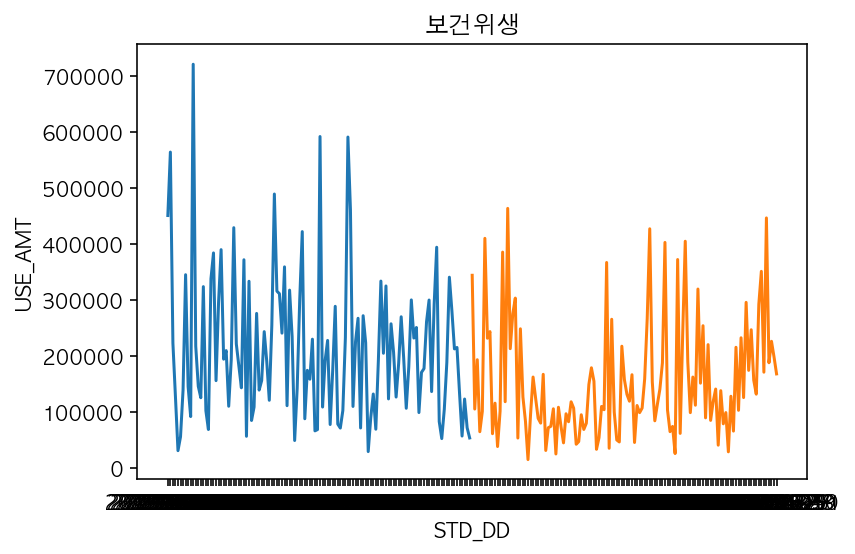

In [217]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=dj_19[dj_19["업종"]=="보건위생"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=dj_20[dj_20["업종"]=="보건위생"])
plt.title("보건위생")

Text(0.5, 1.0, '보건위생')

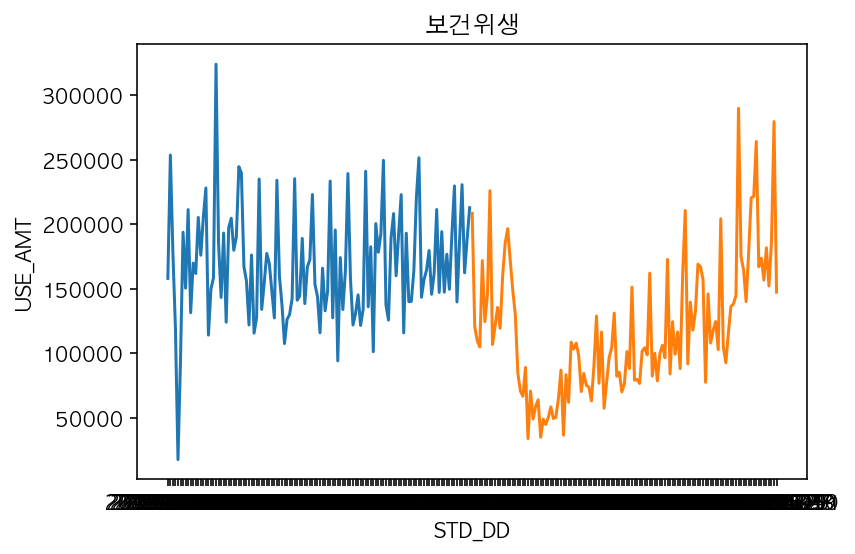

In [218]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=ds_19[ds_19["업종"]=="보건위생"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=ds_20[ds_20["업종"]=="보건위생"])
plt.title("보건위생")

Text(0.5, 1.0, '사무통신')

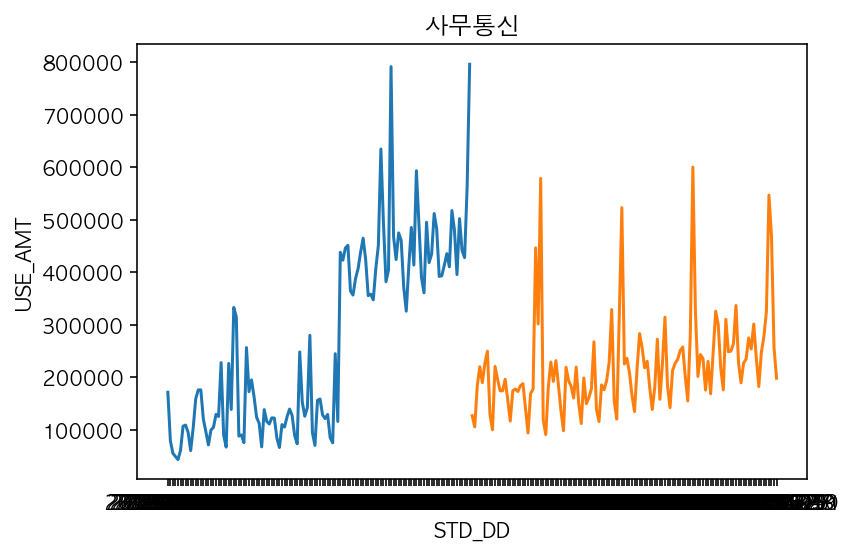

In [171]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[6]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[6]])
plt.title(mct[6])

Text(0.5, 1.0, '문화취미')

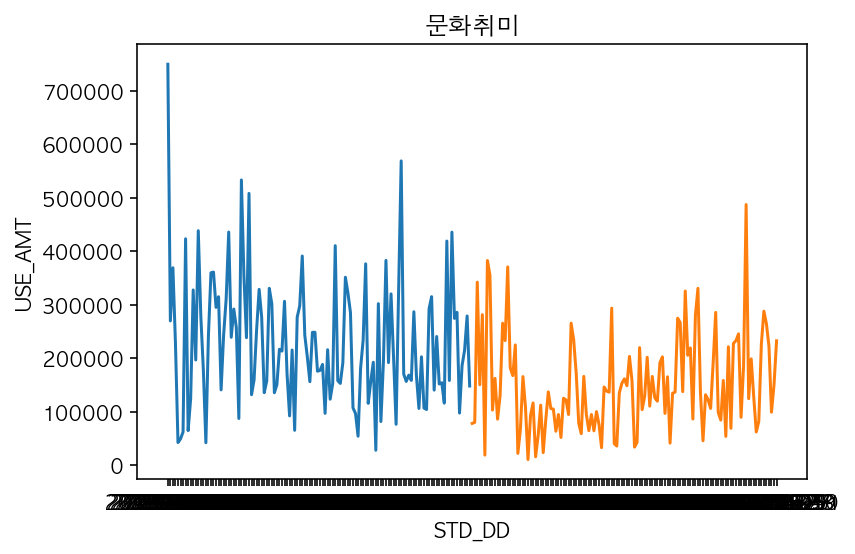

In [219]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=dj_19[dj_19["업종"]=="문화취미"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=dj_20[dj_20["업종"]=="문화취미"])
plt.title("문화취미")

Text(0.5, 1.0, '문화취미')

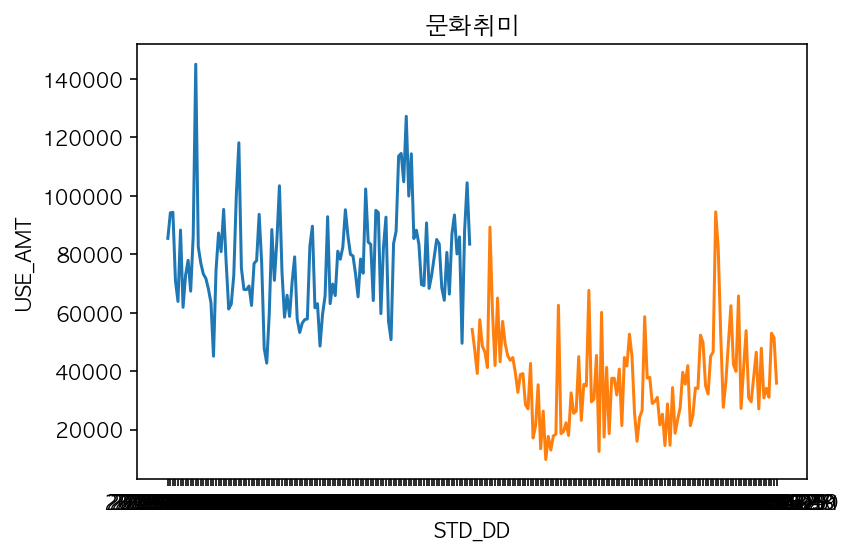

In [220]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=ds_19[ds_19["업종"]=="문화취미"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=ds_20[ds_20["업종"]=="문화취미"])
plt.title("문화취미")

Text(0.5, 1.0, '사무통신')

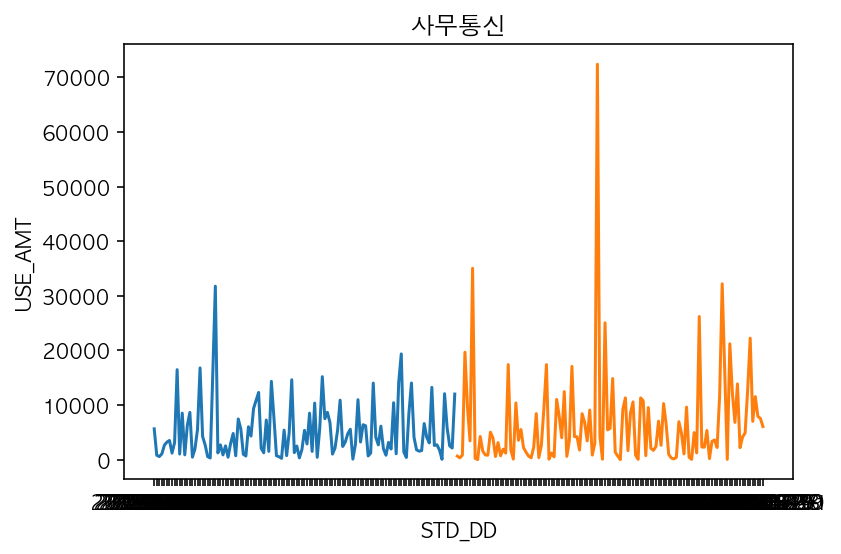

In [207]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_19[sn_19["업종"]=="사무통신"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_20[sn_20["업종"]=="사무통신"])
plt.title("사무통신")

Text(0.5, 1.0, '서적문구')

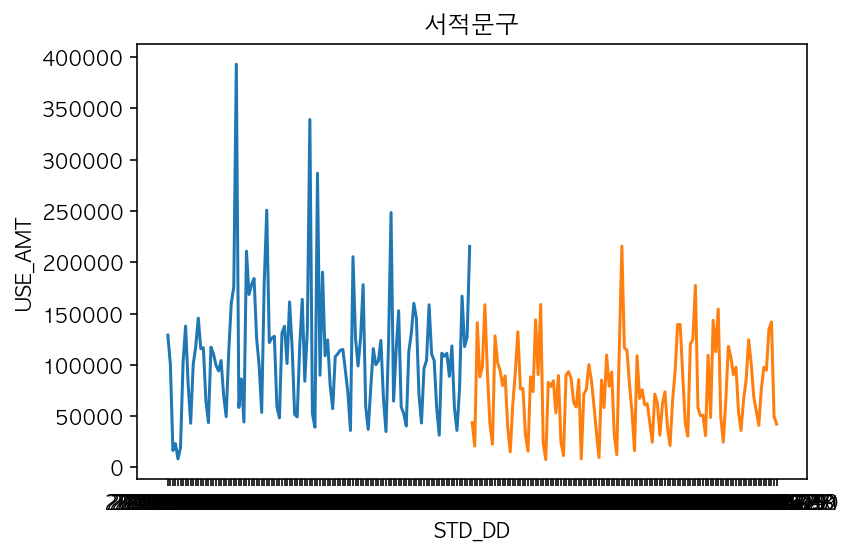

In [172]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[7]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[7]])
plt.title(mct[7])

Text(0.5, 1.0, '수리서비스')

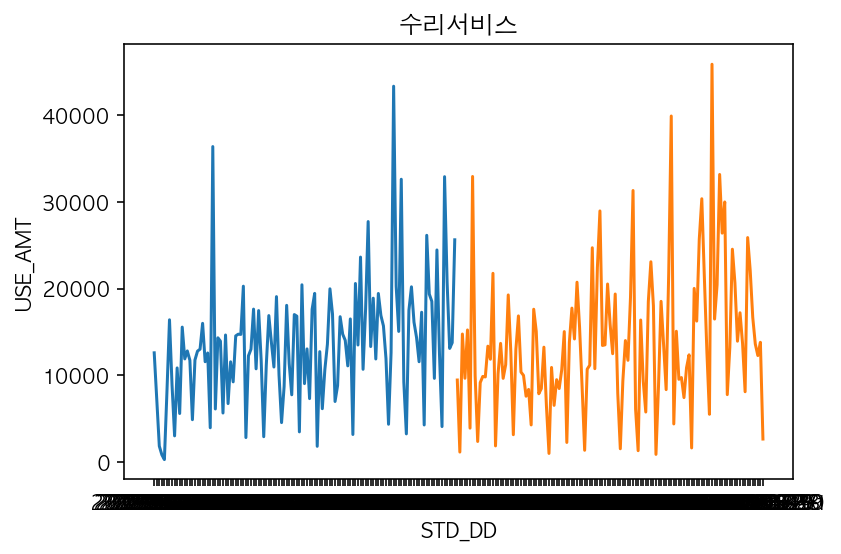

In [173]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[8]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[8]])
plt.title(mct[8])

Text(0.5, 1.0, '숙박')

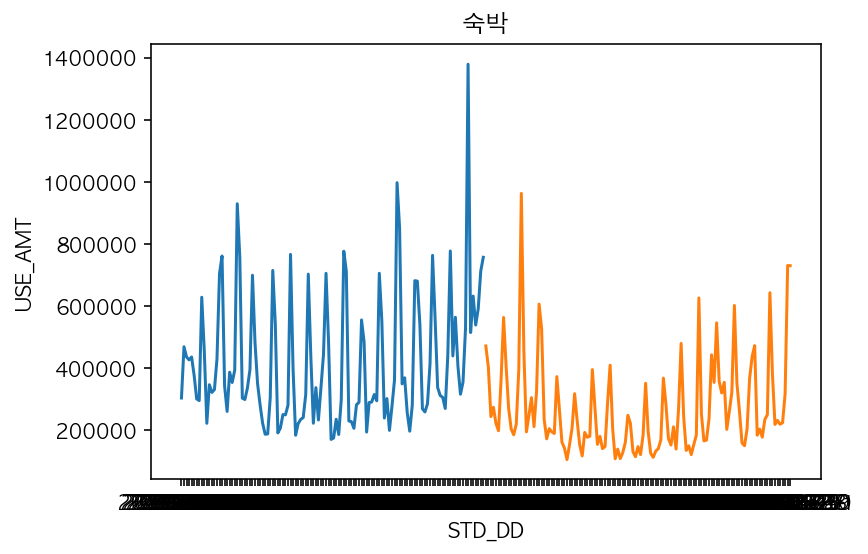

In [174]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[9]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[9]])
plt.title(mct[9])

Text(0.5, 1.0, '신변잡화')

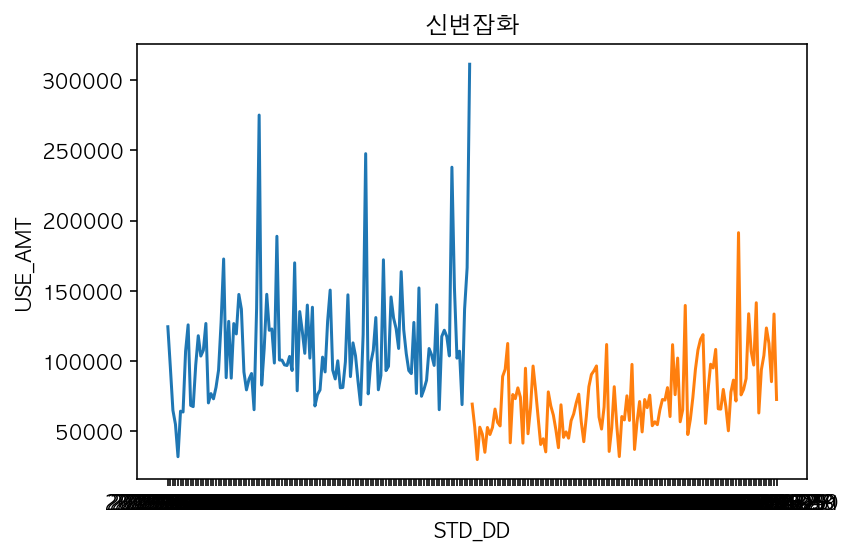

In [176]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[10]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[10]])
plt.title(mct[10])

Text(0.5, 1.0, '신변잡화')

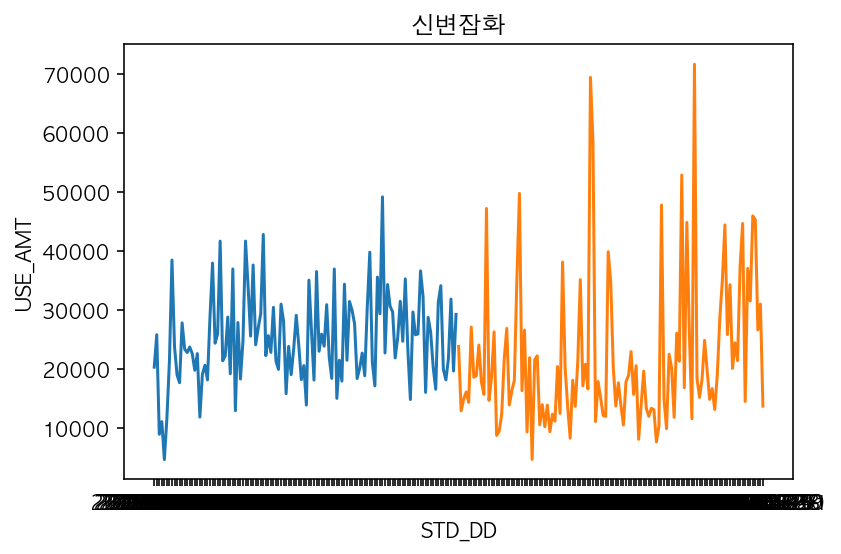

In [212]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_19[sn_19["업종"]=="신변잡화"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_20[sn_20["업종"]=="신변잡화"])
plt.title("신변잡화")

Text(0.5, 1.0, '연료판매')

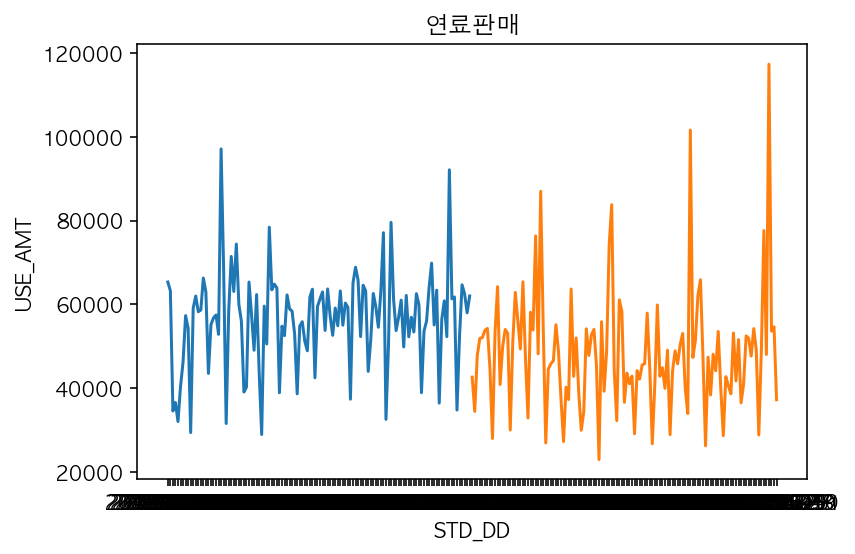

In [177]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[11]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[11]])
plt.title(mct[11])

Text(0.5, 1.0, '요식업소')

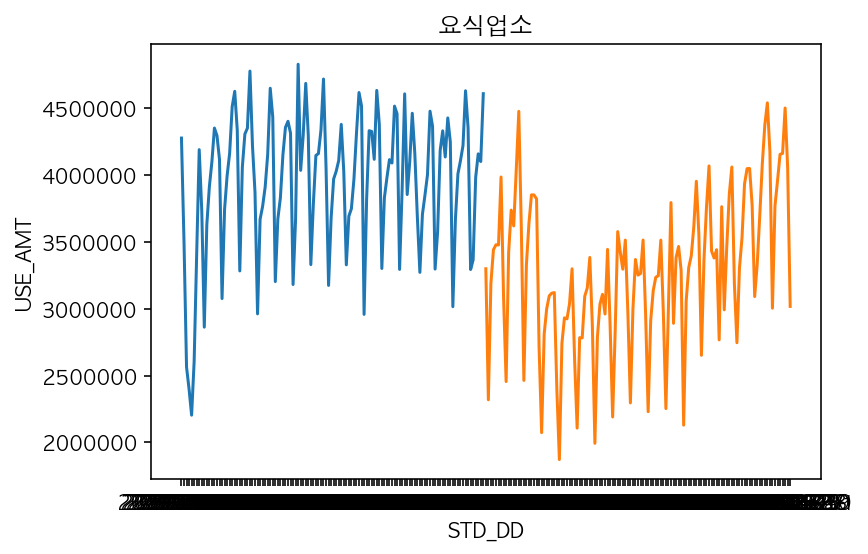

In [178]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[12]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[12]])
plt.title(mct[12])

Text(0.5, 1.0, '요식업소')

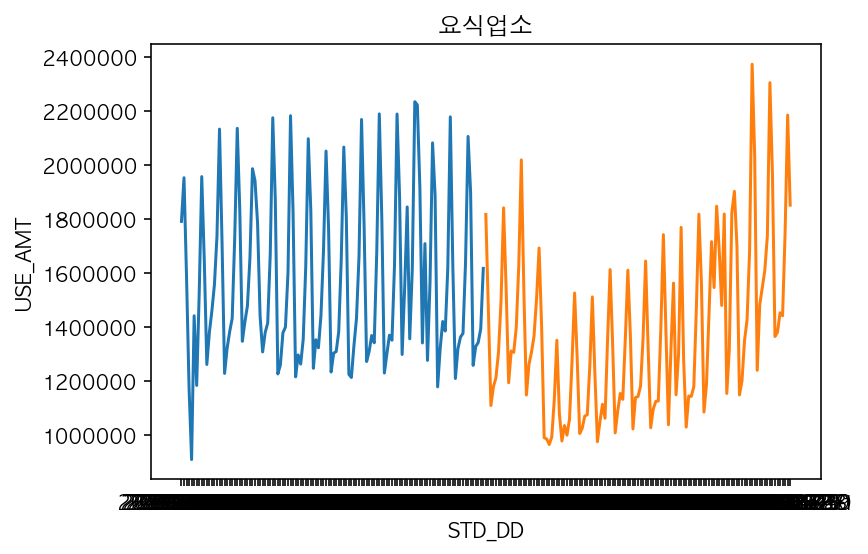

In [214]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_19[sn_19["업종"]=="요식업소"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_20[sn_20["업종"]=="요식업소"])
plt.title("요식업소")

Text(0.5, 1.0, '유통업')

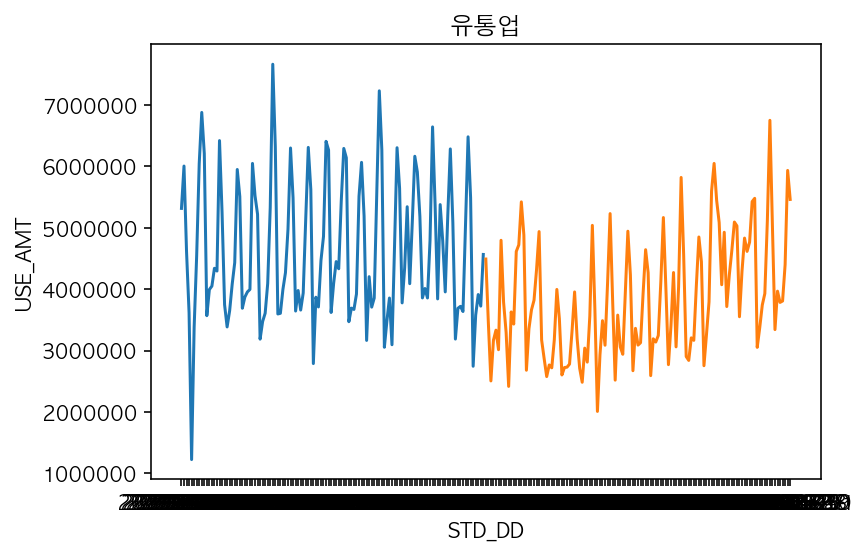

In [179]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[13]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[13]])
plt.title(mct[13]) 

Text(0.5, 1.0, '음료식품')

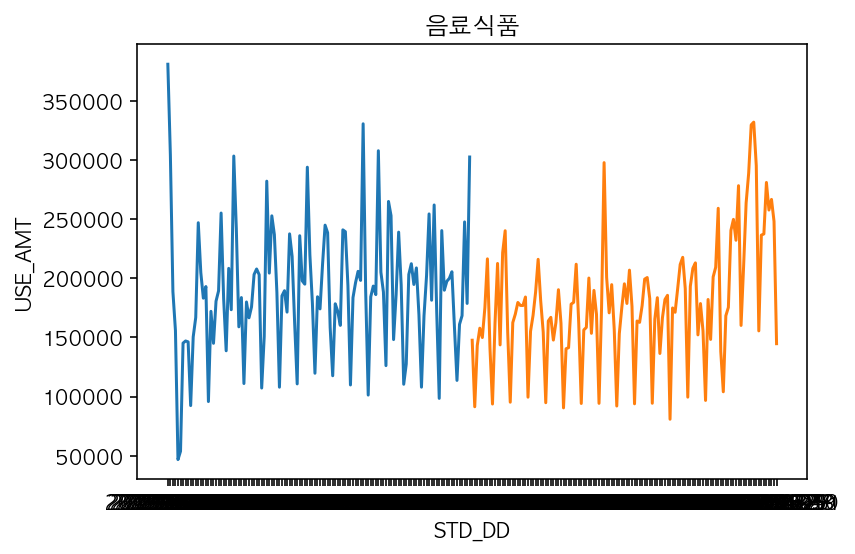

In [180]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[14]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[14]])
plt.title(mct[14])

Text(0.5, 1.0, '의료기관')

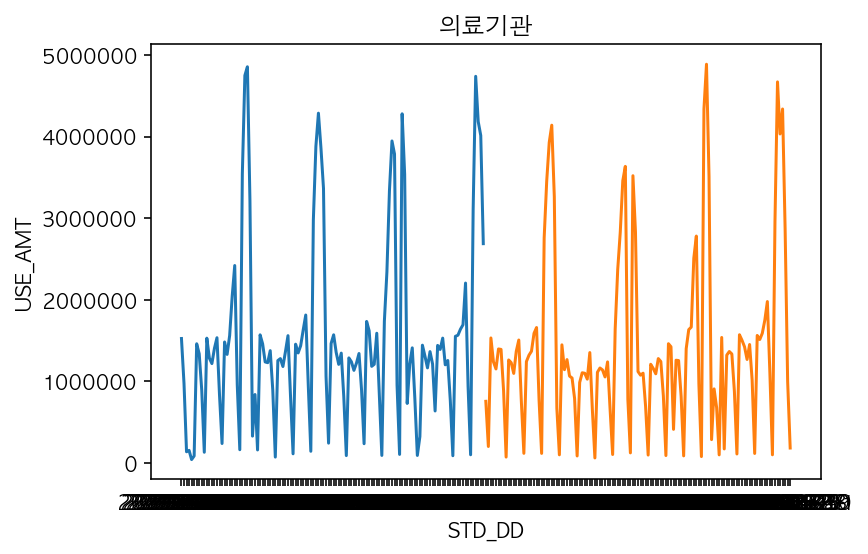

In [181]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[15]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[15]])
plt.title(mct[15])

Text(0.5, 1.0, '의복')

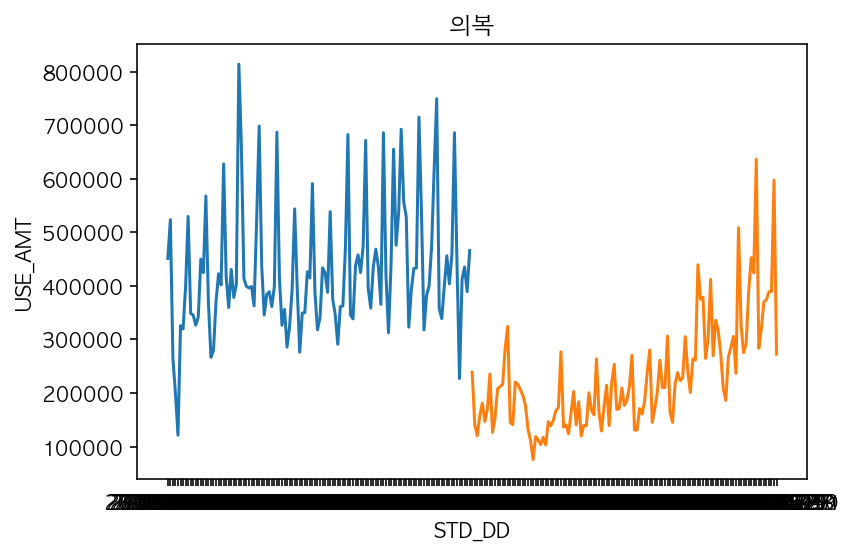

In [182]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[16]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[16]])
plt.title(mct[16])

Text(0.5, 1.0, '자동차정비')

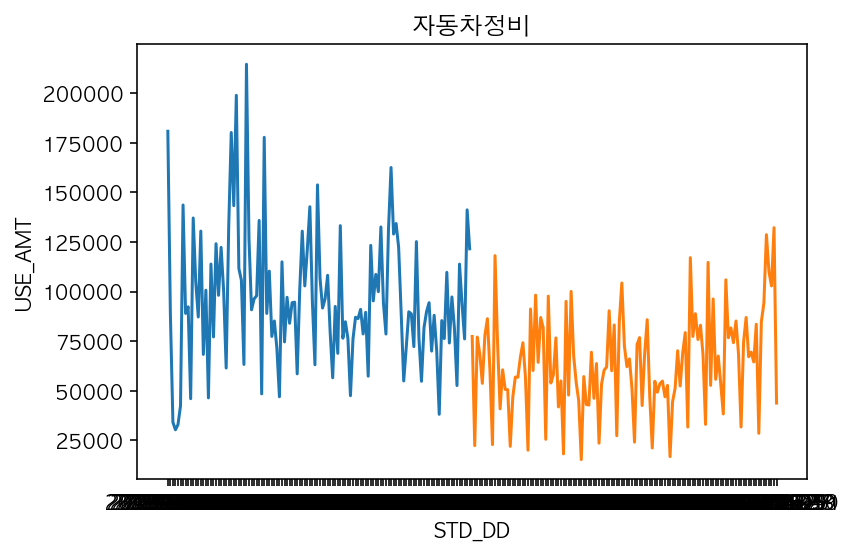

In [183]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[17]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[17]])
plt.title(mct[17])

Text(0.5, 1.0, '주방용구')

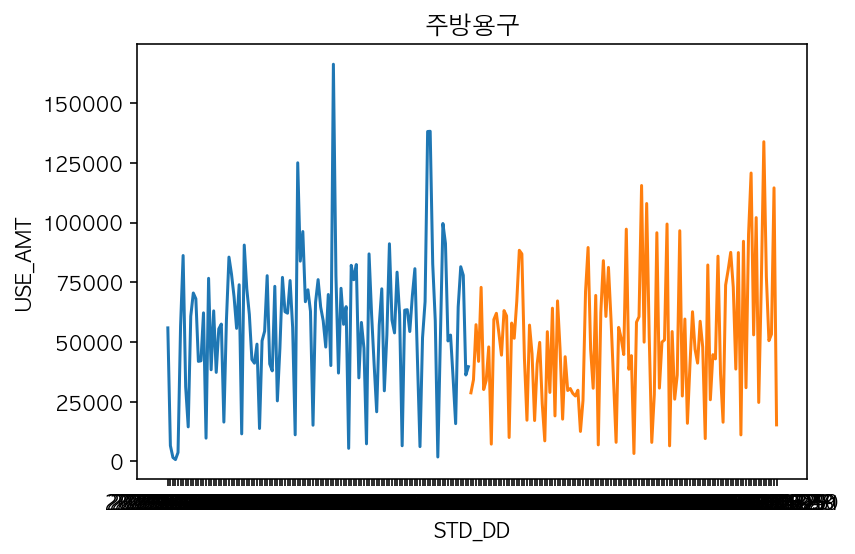

In [184]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[18]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[18]])
plt.title(mct[18])

Text(0.5, 1.0, '주방용구')

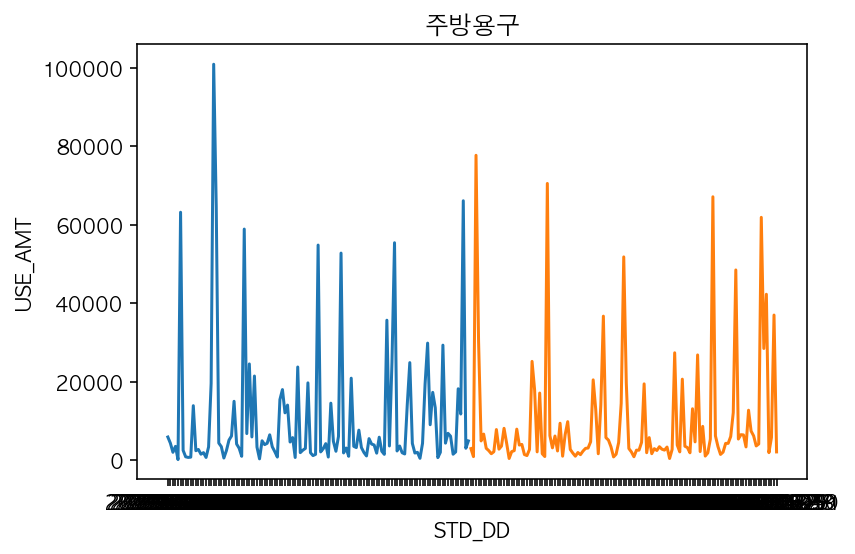

In [208]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_19[sn_19["업종"]=="주방용구"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_20[sn_20["업종"]=="주방용구"])
plt.title("주방용구")

Text(0.5, 1.0, '주방용구')

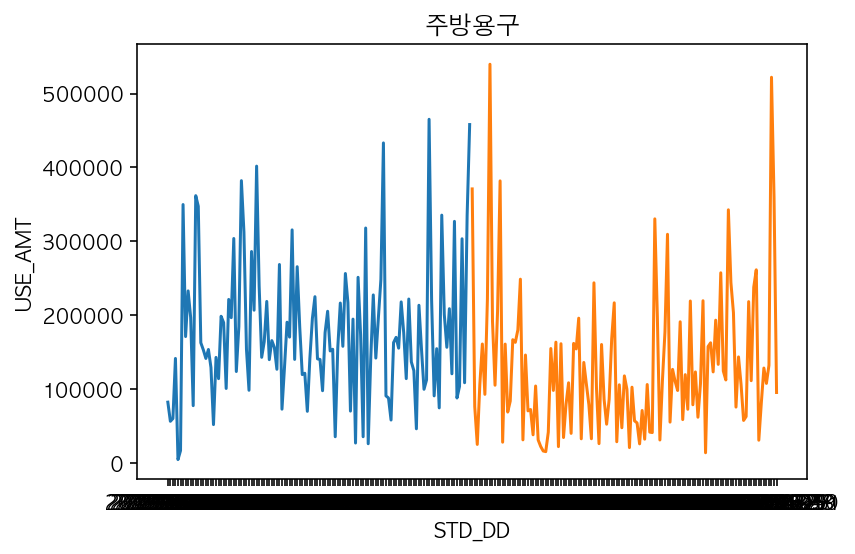

In [209]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=dj_19[dj_19["업종"]=="주방용구"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=dj_20[dj_20["업종"]=="주방용구"])
plt.title("주방용구")

Text(0.5, 1.0, '주방용구')

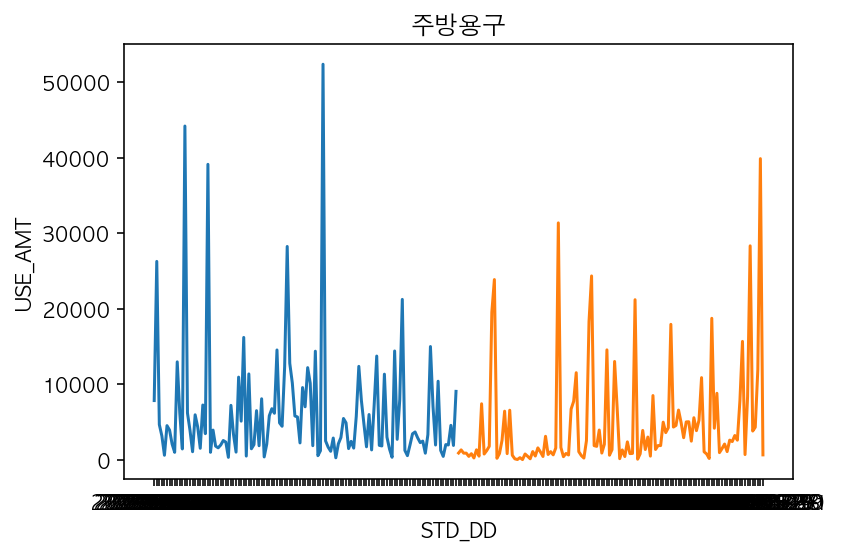

In [210]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=ds_19[ds_19["업종"]=="주방용구"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=ds_20[ds_20["업종"]=="주방용구"])
plt.title("주방용구")

Text(0.5, 1.0, '직물')

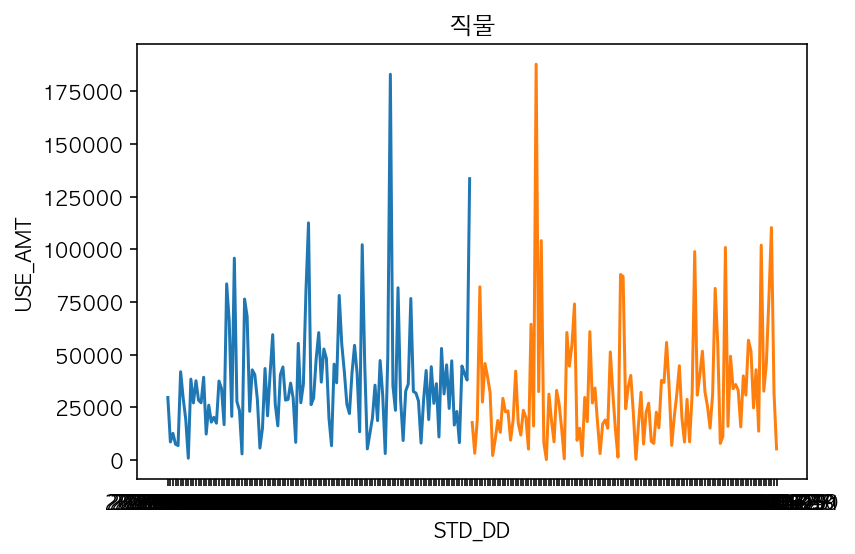

In [185]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[19]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[19]])
plt.title(mct[19])

Text(0.5, 1.0, '가구')

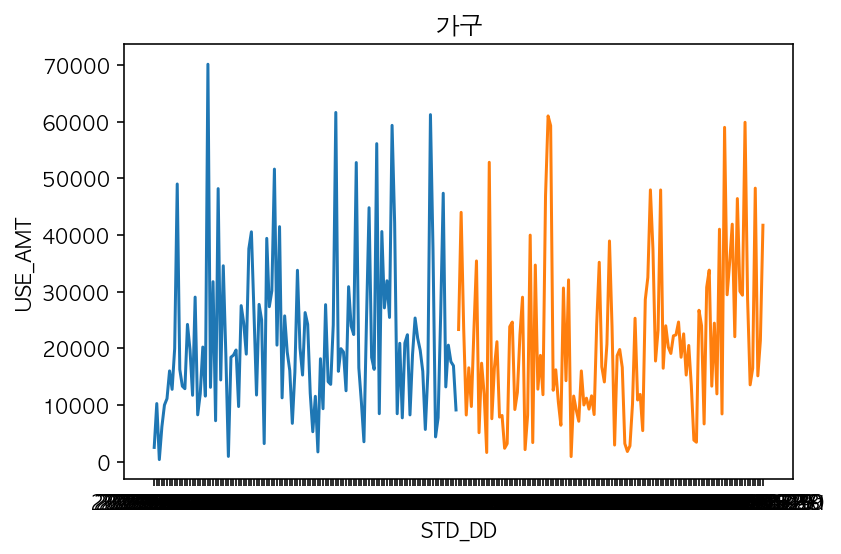

In [186]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[20]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[20]])
plt.title(mct[20])

# 생각보다 오히려 가구 매출은 줄지 않았다..?

Text(0.5, 1.0, '자동차판매')

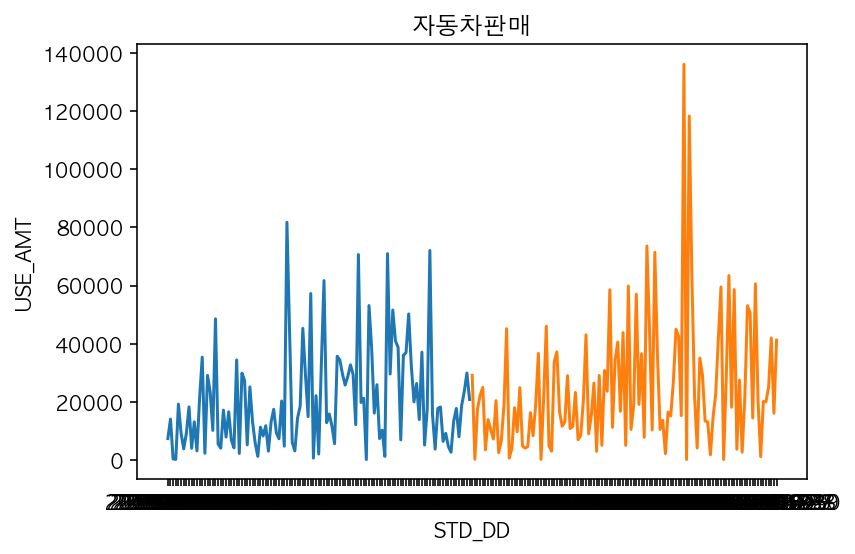

In [187]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[21]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[21]])
plt.title(mct[21])
# 자동차판매..?

Text(0.5, 1.0, '전기')

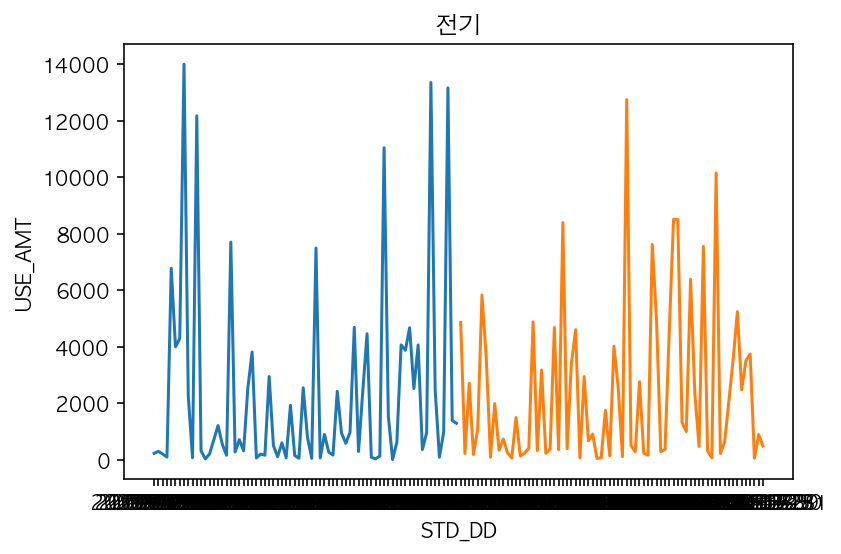

In [188]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_19[sj_19["업종"]==mct[22]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sj_20[sj_20["업종"]==mct[22]])
plt.title(mct[22])

- 서울 노원구

In [190]:
# 업종, 날짜만
sn_m = res_sn[["USE_CNT", "USE_AMT"]].groupby([res_sn["업종"], res_sn["STD_DD"]]).sum()
sn_m.reset_index(inplace=True)

# 19년도
sn_m["STD_DD"] = sn_m["STD_DD"].astype("str")
sn_19 = sn_m[sn_m["STD_DD"].str.contains("2019")]

# 20년도
sn_m["STD_DD"] = sn_m["STD_DD"].astype("str")
sn_20 = sn_m[sn_m["STD_DD"].str.contains("2020")]

# 업종코드
mct = res_sn["업종"].unique()

Text(0.5, 1.0, '가전')

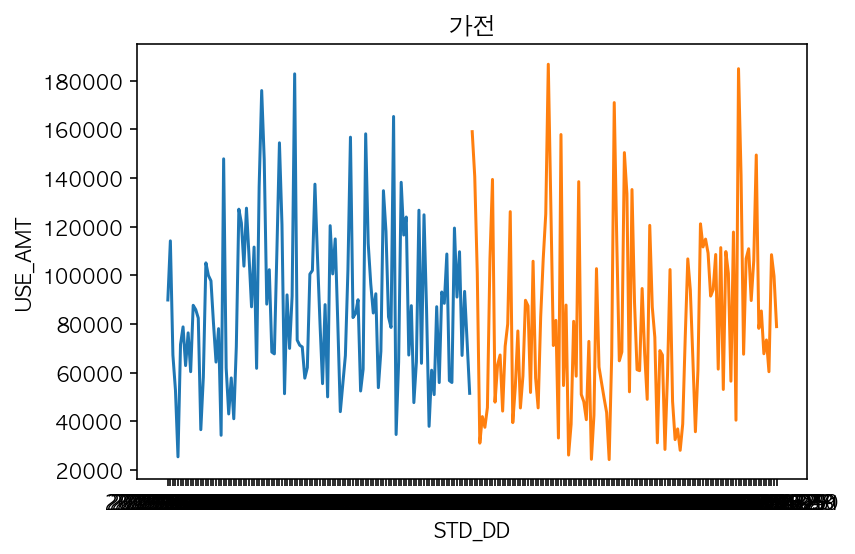

In [191]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_19[sn_19["업종"]==mct[0]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_20[sn_20["업종"]==mct[0]])
plt.title(mct[0])

Text(0.5, 1.0, '광학제품')

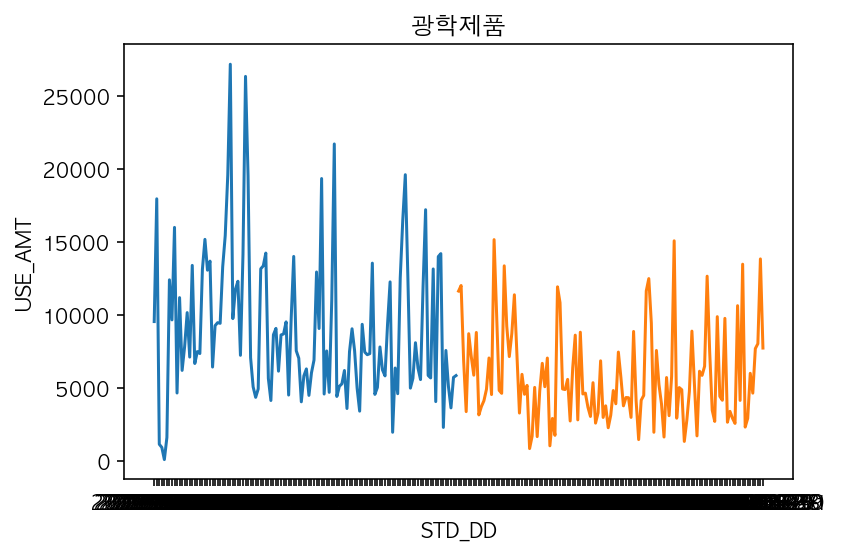

In [192]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_19[sn_19["업종"]==mct[1]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_20[sn_20["업종"]==mct[1]])
plt.title(mct[1]) 

Text(0.5, 1.0, '문화취미')

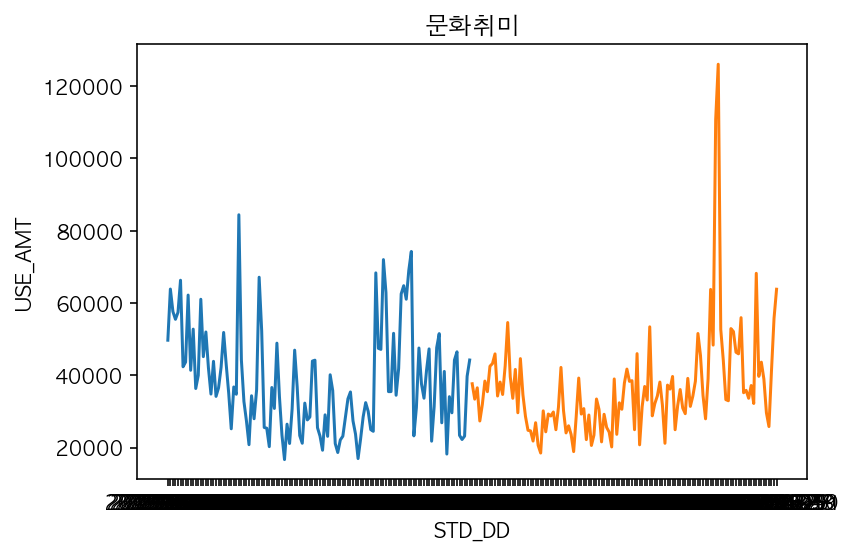

In [194]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_19[sn_19["업종"]==mct[4]])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_20[sn_20["업종"]==mct[4]])
plt.title(mct[4]) 

Text(0.5, 1.0, '요식업소')

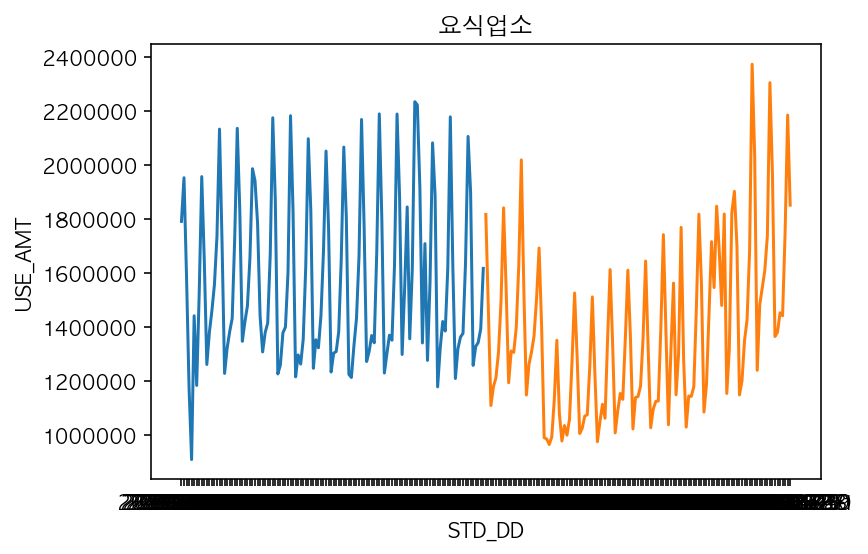

In [197]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_19[sn_19["업종"]=="요식업소"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=sn_20[sn_20["업종"]=="요식업소"])
plt.title("요식업소") 

- 대구 중구

In [198]:
# 업종, 날짜만
dj_m = res_dj[["USE_CNT", "USE_AMT"]].groupby([res_sj["업종"], res_dj["STD_DD"]]).sum()
dj_m.reset_index(inplace=True)

# 19년도
dj_m["STD_DD"] = dj_m["STD_DD"].astype("str")
dj_19 = dj_m[dj_m["STD_DD"].str.contains("2019")]

# 20년도
dj_m["STD_DD"] = dj_m["STD_DD"].astype("str")
dj_20 = dj_m[dj_m["STD_DD"].str.contains("2020")]

# 업종코드 
mct = res_dj["업종"].unique()

Text(0.5, 1.0, '요식업소')

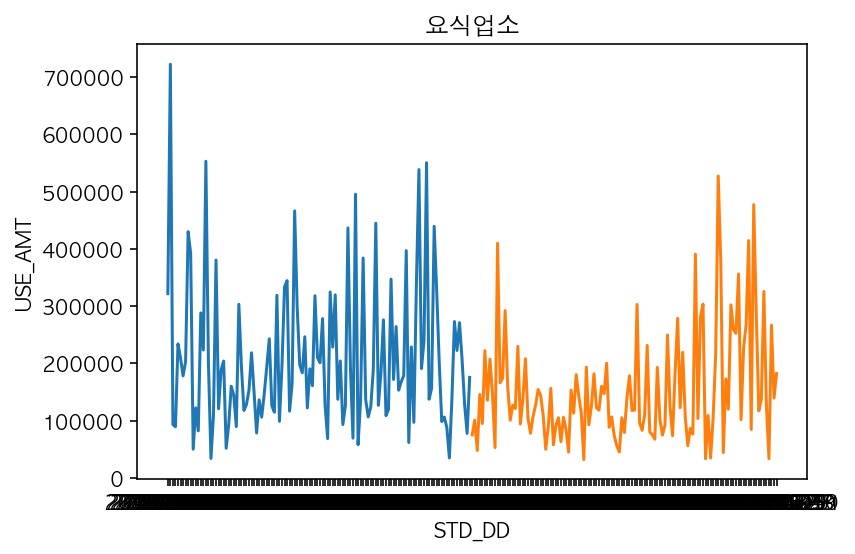

In [200]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=dj_19[dj_19["업종"]=="요식업소"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=dj_20[dj_20["업종"]=="요식업소"])
plt.title("요식업소") 

- 대구 수성구

In [201]:
# 업종, 날짜만
ds_m = res_ds[["USE_CNT", "USE_AMT"]].groupby([res_ds["업종"], res_ds["STD_DD"]]).sum()
ds_m.reset_index(inplace=True)

# 19년도
ds_m["STD_DD"] = ds_m["STD_DD"].astype("str")
ds_19 = ds_m[ds_m["STD_DD"].str.contains("2019")]

# 20년도
ds_m["STD_DD"] = ds_m["STD_DD"].astype("str")
ds_20 = ds_m[ds_m["STD_DD"].str.contains("2020")]

# 업종코드 
mct = res_ds["업종"].unique()

Text(0.5, 1.0, '요식업소')

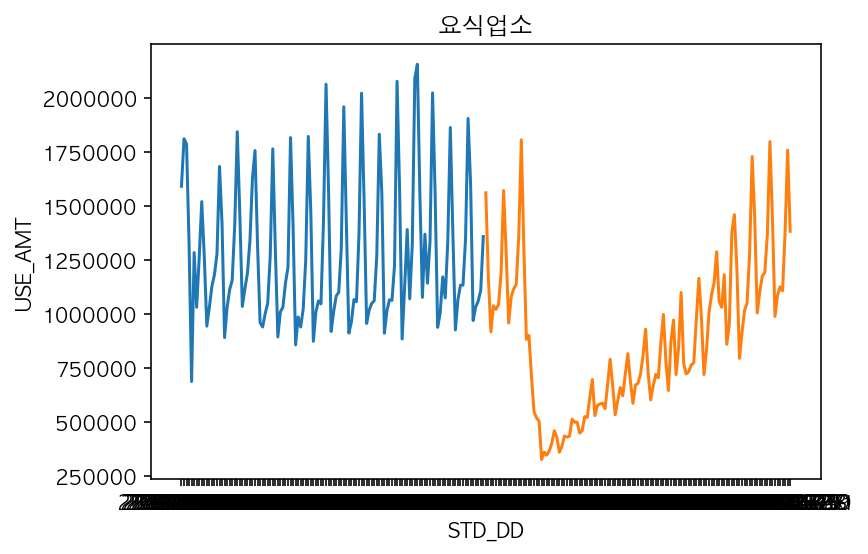

In [202]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=ds_19[ds_19["업종"]=="요식업소"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=ds_20[ds_20["업종"]=="요식업소"])
plt.title("요식업소") 

Text(0.5, 1.0, '보건위생')

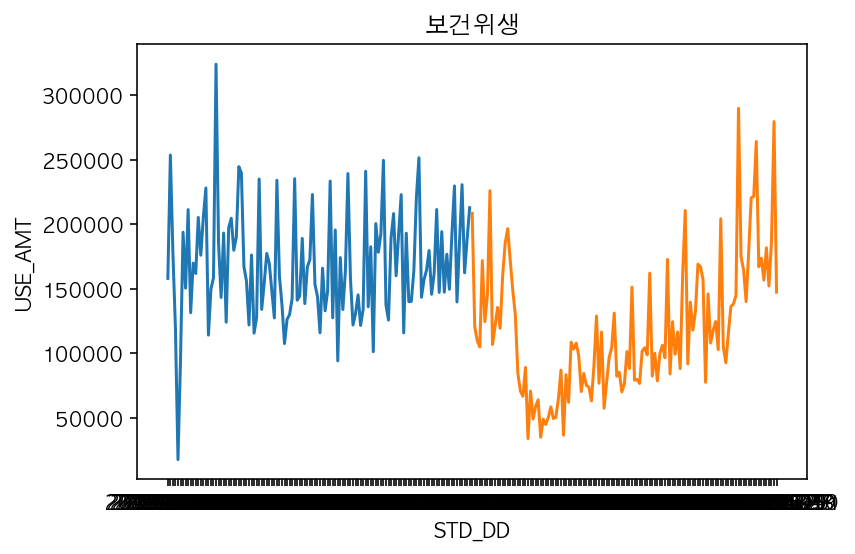

In [203]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=ds_19[ds_19["업종"]=="보건위생"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=ds_20[ds_20["업종"]=="보건위생"])
plt.title("보건위생")

Text(0.5, 1.0, '대구 중구 보건위생')

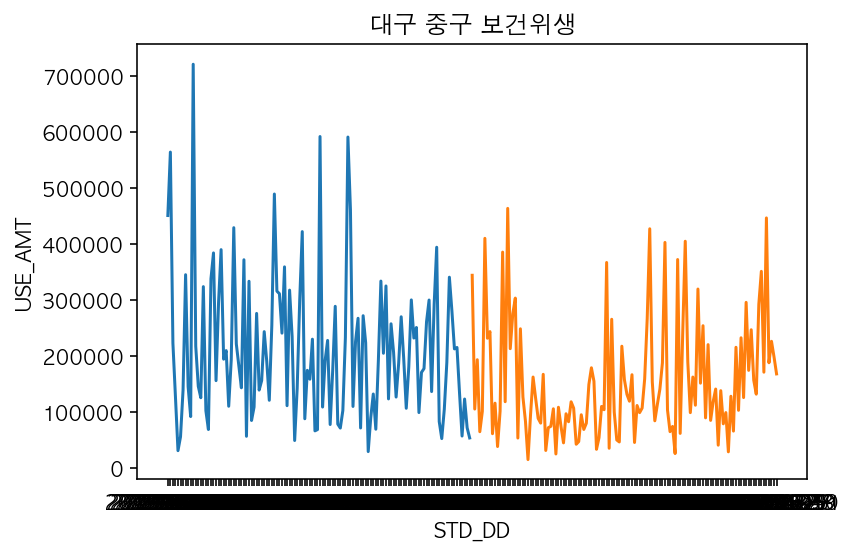

In [205]:
sns.lineplot(x="STD_DD",y="USE_AMT", data=dj_19[dj_19["업종"]=="보건위생"])
sns.lineplot(x="STD_DD",y="USE_AMT", data=dj_20[dj_20["업종"]=="보건위생"])
plt.title("대구 중구 보건위생")